## Some pictures of posters


In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


DATA_DIR = "data"


def get_poster(movie_id: str, show: bool = True) -> None:
    poster_path = os.path.join(DATA_DIR, os.path.join("posters", f"{movie_id}.jpg"))
    print(poster_path)
    img = mpimg.imread(poster_path)
    return img


def plot_poster(movie_id: str) -> None:
    imgplot = plt.imshow(get_poster(movie_id))
    plt.show()

data/posters/1000015.jpg


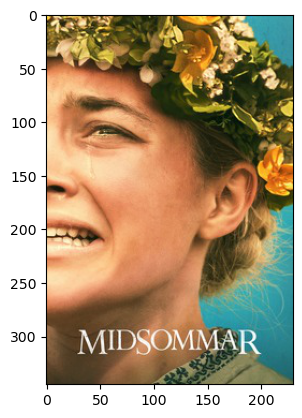

In [2]:
%matplotlib inline
plot_poster('1000015')

## Basic Data Descriptions


### movies.csv


In [3]:
import pandas as pd

movies = pd.read_csv(os.path.join(DATA_DIR, "movies.csv"))
movies

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.91
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.57
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.32
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,Interstellar,2014.0,Mankind was born on Earth. It was never meant ...,The adventures of a group of explorers who mak...,169.0,4.32
...,...,...,...,...,...,...,...
896395,1896389,伝七捕物帖 銀蛇呪文,NaN,NaN,Kofu duty guard Yamauchi Hinata-kami cultivate...,98.0,NaN
896396,1896390,太阳的子民 Sa'icelen,NaN,NaN,"The government's discriminatory policies, wars...",38.0,NaN
896397,1896391,柴咲コウ CONCERT TOUR 2023 ACTOR'S THE BEST,NaN,NaN,KO SHIBASAKI CONCERT TOUR 2023 - ACTOR'S THE BEST,NaN,NaN
896398,1896392,相知相守民歌45演唱会,NaN,NaN,NaN,262.0,NaN


### genres.csv


In [4]:
genres = pd.read_csv(os.path.join(DATA_DIR, "genres.csv"))
genres

,id,genre
0,1000001,Comedy
1,1000001,Fantasy
2,1000001,Adventure
3,1000002,Comedy
4,1000002,Thriller
...,...,...
990765,1896380,Crime
990766,1896380,Drama
990767,1896382,Drama
990768,1896391,Music


<Axes: xlabel='genre'>

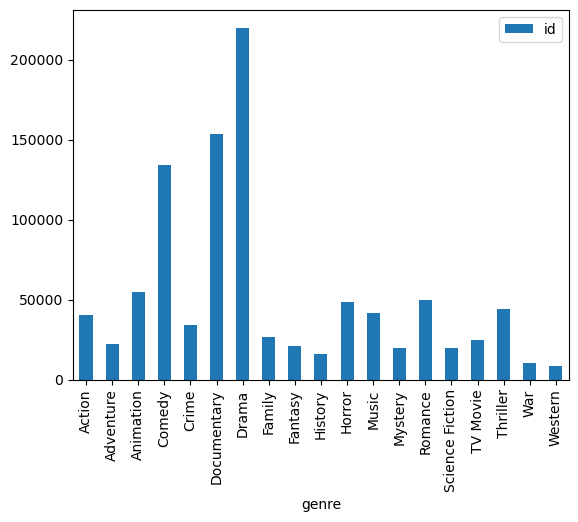

In [10]:
# seems like we need a bit of balancing here
genres.groupby("genre").count().plot(kind="bar")

One movie can have multiple genres.

Let's see the genre counts by movie:


Least number of genres for a movie: 1
Most number of genres for a movie: 16


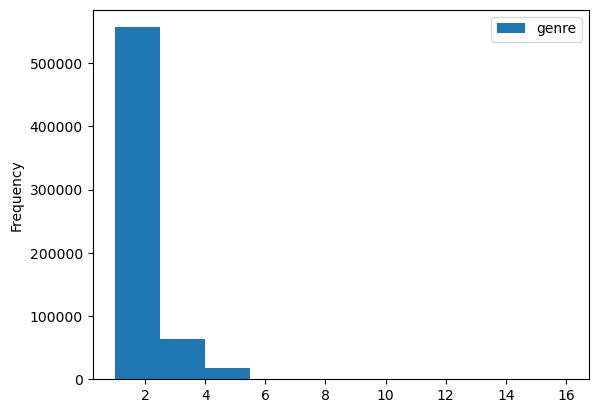

In [13]:
genre_counts = genres.groupby("id").count().sort_values("genre", ascending=False)
genre_counts.plot(kind="hist")
print(f"Least number of genres for a movie: {genre_counts['genre'].min()}")
print(f"Most number of genres for a movie: {genre_counts['genre'].max()}")

Let's find out the movie ids and number of movies


In [18]:
number_of_movies = genres.id.unique().shape[0]
number_of_movies

638632

In [29]:
pd.set_option("display.float_format", lambda x: "%10.f" % x)

genres.describe()

,id
count,990770
mean,1355200
std,252010
min,1000001
25%,1131709
50%,1316492
75%,1557642
max,1896393


Convert an int to a movie id:


In [43]:
# read the genres.csv file again for the function closure
genres_df = pd.read_csv(os.path.join(DATA_DIR, "genres.csv"))
all_ids = genres_df.id.unique()
all_ids.sort()


def get_movie_id(id: int) -> str:
    return str(all_ids[id])

In [46]:
get_movie_id(200000)

'1216053'